Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential

### Importing all the important libraries

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/drive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path('/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               labels= "inferred",
                                                               label_mode="categorical",
                                                               subset='training',
                                                               validation_split=0.2,
                                                               batch_size=batch_size,
                                                               image_size=(img_height,img_width),
                                                               seed = 123
                                                               )


Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_test,
                                                             labels= "inferred",
                                                             label_mode="categorical",
                                                             subset='validation',
                                                             validation_split=0.2,
                                                             batch_size=batch_size,
                                                             image_size=(img_height,img_width),
                                                             seed = 123
                                                             )

Found 118 files belonging to 9 classes.
Using 23 files for validation.


In [ ]:
train_ds.class_names[0]

'actinic keratosis'

In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

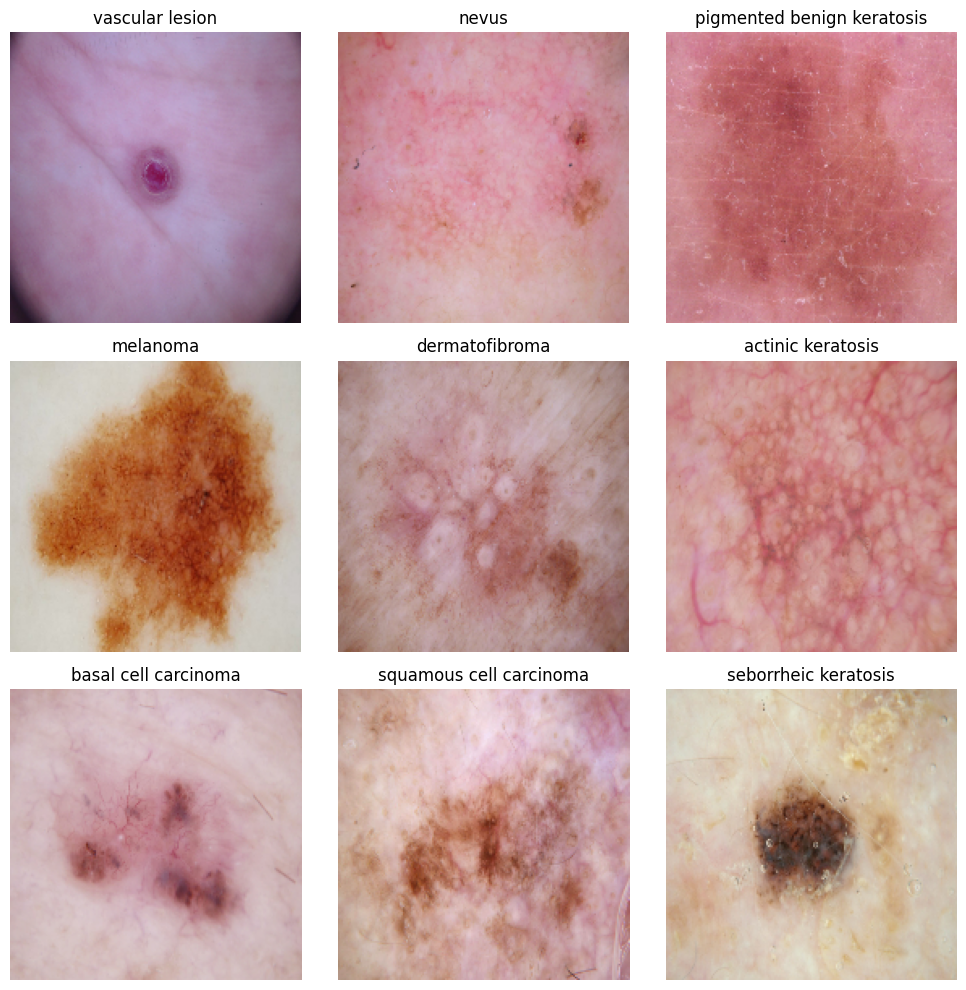

In [ ]:
import matplotlib.pyplot as plt


# Get the class names from the dataset
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
num_classes = len(class_names)
images_per_class = []



# Find one image for each class
for images, labels in train_ds:
  for i in range(len(labels)):
    label = np.argmax(labels[i])
    if label not in images_per_class:
      images_per_class.append(label)
      plt.subplot(3, 3, len(images_per_class))
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[label])
      plt.axis("off")
      if len(images_per_class) == num_classes:
        break
      if len(images_per_class) == num_classes:
        break

plt.tight_layout()
plt.show()


### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
# We are asked to normalize the values between 0 and 1. Which means we have to
# divide all the values by 255.

normalize = layers.experimental.preprocessing.Rescaling(1./255)

# Create a CNN Model

model = Sequential([
    layers.BatchNormalization(input_shape=(img_height,img_width,3)),
    normalize,
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.build(input_shape=(batch_size,img_height,img_width,3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_1 (Bat  (None, 180, 180, 3)       12        
 chNormalization)                                                
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 43, 43, 64)       

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 25s 113ms/step - loss: 2.0072 - accuracy: 0.2232 - val_loss: 2.3061 - val_accuracy: 0.0870
Epoch 2/20
56/56 [==============================] - 2s 37ms/step - loss: 1.8781 - accuracy: 0.3131 - val_loss: 2.1099 - val_accuracy: 0.1739
Epoch 3/20
56/56 [==============================] - 2s 36ms/step - loss: 1.8260 - accuracy: 0.3432 - val_loss: 2.2365 - val_accuracy: 0.2174
Epoch 4/20
56/56 [==============================] - 2s 36ms/step - loss: 1.7643 - accuracy: 0.3806 - val_loss: 2.3374 - val_accuracy: 0.1739
Epoch 5/20
56/56 [==============================] - 2s 37ms/step - loss: 1.6740 - accuracy: 0.3984 - val_loss: 2.9623 - val_accuracy: 0.1739
Epoch 6/20
56/56 [==============================] - 2s 37ms/step - loss: 1.6421 - accuracy: 0.4029 - val_loss: 2.2256 - val_accuracy: 0.1739
Epoch 7/20
56/56 [==============================] - 2s 37ms/step - loss: 1.5122 - accuracy: 0.4621 - val_loss: 2.3497 - val_accuracy: 0.1739
Epoch 8/20


### Visualizing training results

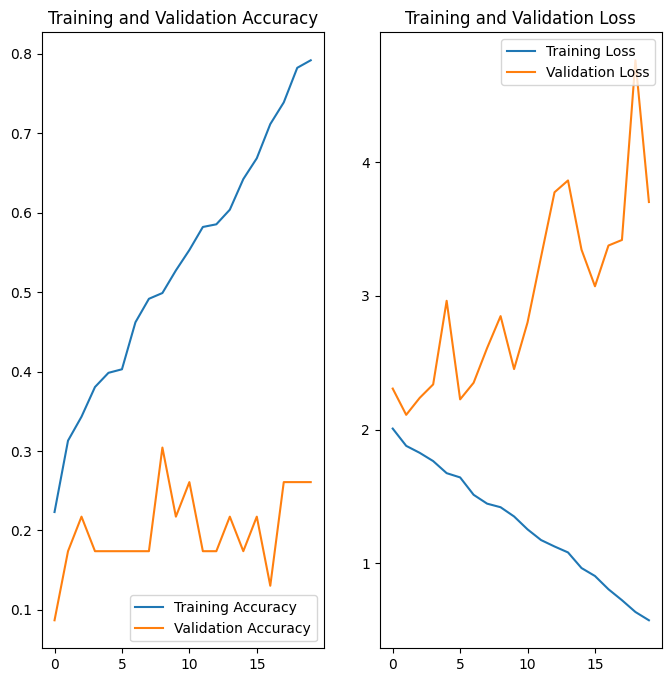

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here
#Here's how to interpret these graphs:

Training And Validation Accuracy:
Ideal Scenario:

Training Accuracy: Initially, both training and validation accuracies increase as the model learns and improves on the data.
Validation Accuracy: Continues to increase along with the training accuracy, showing that the model generalizes well to unseen data.
Overfitting:

Training Accuracy: Continues to increase or stays high as the model learns complex patterns within the training data, even noise or irrelevant patterns.
Validation Accuracy: Initially increases but starts decreasing or remains stagnant after a point, showing that the model doesn't generalize well to unseen data.
Underfitting:

Training Accuracy: Stays low, indicating that the model fails to capture the underlying patterns of the data.
Validation Accuracy: Remains low and doesn't improve significantly, showing that the model doesn't generalize well to both the training and validation data.

##So, from the above analysis, the graph definitely shows overfitting. The Training accuracy increases along with the Validation accuracy initially. The Validation accuracy tends to remain low while the training accuracy tends to increase along.


#Here's how to interpret training loss and validation loss graphs:

Ideal Scenario:

Training Loss: Initially high and gradually decreases as the model learns from the data.
Validation Loss: Decreases in tandem with training loss, indicating the model generalizes well to unseen data.
Overfitting:

Training Loss: Continues to decrease or remains very low, showing that the model fits the training data very well.
Validation Loss: Starts increasing after reaching a minimum, diverging from the training loss, indicating the model fails to generalize to new, unseen data.
Underfitting:

Training Loss: Stays high or decreases very slowly, showing the model fails to capture the patterns in the training data.
Validation Loss: Remains high or decreases slightly, indicating the model doesn't generalize well to both the training and validation data.

##So, from the graphs, it shows that there is a huge gap between the training loss and validation loss which shows overfitting failing to generalize new or unseen data.

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
# Define augmentation layers
data_augmentation = Sequential([
    #layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomRotation(factor=0.4),  # Randomly rotate images by a factor of 20% of the image size
    layers.experimental.preprocessing.RandomZoom(height_factor=0.2, width_factor=0.2),  # Randomly zoom images by 20%
    #layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),  # Randomly translate images by 10%
    #layers.experimental.preprocessing.RandomFlip("horizontal"),  # Randomly flip images horizontally
    # Add more augmentation layers as needed
])

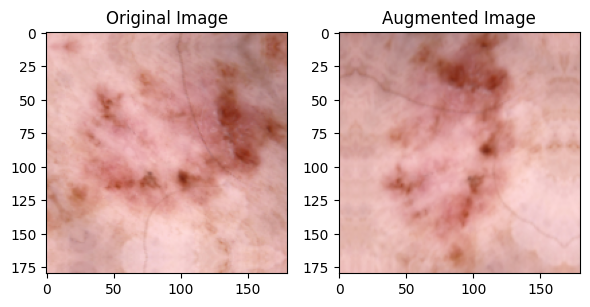

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
augmented_train_ds = train_ds.map(lambda x,y: (data_augmentation(x, training=True), y))

#flip = layers.experimental.preprocessing.RandomRotation(factor=0.4)
# Choose one image from the training dataset
for images, labels in augmented_train_ds.take(1):  # Assuming 'augmented_train_dataset' is your augmented dataset
    image = images[0]  # Selecting the first image in the batch

# Display the original and augmented images
plt.figure(figsize=(6, 3))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image.numpy().astype("uint8"))  # Displaying the image

# Augmented image
plt.subplot(1, 2, 2)
plt.title('Augmented Image')
plt.imshow(data_augmentation(image).numpy().astype("uint8"))  # Applying augmentation and displaying the image

plt.tight_layout()
plt.show()


### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
# Define augmentation layers
data_augmentation = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.experimental.preprocessing.RandomRotation(factor=0.4),  # Randomly rotate images by a factor of 20% of the image size
    layers.experimental.preprocessing.RandomZoom(height_factor=0.2, width_factor=0.2),  # Randomly zoom images by 20%
    #layers.experimental.preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),  # Randomly translate images by 10%
    #layers.experimental.preprocessing.RandomFlip("horizontal"),  # Randomly flip images horizontally
    # Add more augmentation layers as needed
])


model = Sequential([
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu',input_shape=(img_height,img_width,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])



### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
## your training code

Epoch 1/20
56/56 [==============================] - 5s 39ms/step - loss: 2.1551 - accuracy: 0.1791 - val_loss: 2.4779 - val_accuracy: 0.0435
Epoch 2/20
56/56 [==============================] - 2s 34ms/step - loss: 2.0132 - accuracy: 0.2411 - val_loss: 2.3017 - val_accuracy: 0.1739
Epoch 3/20
56/56 [==============================] - 2s 35ms/step - loss: 1.9091 - accuracy: 0.2695 - val_loss: 2.2595 - val_accuracy: 0.1739
Epoch 4/20
56/56 [==============================] - 2s 36ms/step - loss: 1.8520 - accuracy: 0.3315 - val_loss: 2.4187 - val_accuracy: 0.2609
Epoch 5/20
56/56 [==============================] - 2s 36ms/step - loss: 1.7302 - accuracy: 0.3588 - val_loss: 2.4656 - val_accuracy: 0.2609
Epoch 6/20
56/56 [==============================] - 2s 36ms/step - loss: 1.6781 - accuracy: 0.3839 - val_loss: 2.1864 - val_accuracy: 0.2609
Epoch 7/20
56/56 [==============================] - 2s 34ms/step - loss: 1.5960 - accuracy: 0.4297 - val_loss: 2.4938 - val_accuracy: 0.3478
Epoch 8/20
56

### Visualizing the results

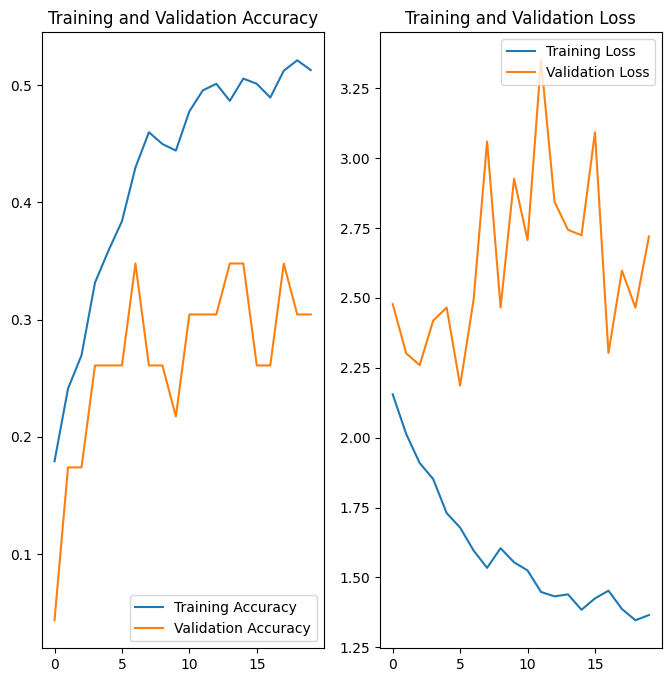

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

##We see that there is a decrease in overfitting compared to the previous model. The accuracy of the model has also increased. There is definitely overfitting because of the lack of data in the various categories.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
from collections import Counter
## Your code goes here.
# Get the class names from the dataset


# Count occurrences of each class label
class_counts = Counter()

for _, labels in train_ds:
    for label in labels.numpy():
        class_counts[class_names[label.argmax()]] += 1

# Print number of images in each class
for class_name, count in class_counts.items():
    print(f"Class: {class_name}, Number of Images: {count}")

Class: melanoma, Number of Images: 352
Class: nevus, Number of Images: 277
Class: seborrheic keratosis, Number of Images: 58
Class: basal cell carcinoma, Number of Images: 309
Class: pigmented benign keratosis, Number of Images: 370
Class: squamous cell carcinoma, Number of Images: 142
Class: dermatofibroma, Number of Images: 77
Class: actinic keratosis, Number of Images: 92
Class: vascular lesion, Number of Images: 115


In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train,'*','*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()), columns = ['Path','Label'])

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
## Seborrheic Keratosis has the least number of samples.
#### - Which classes dominate the data in terms proportionate number of samples?
## Pigmented benign keratosis has the highest number of samples at 370.


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=data_dir_train
import Augmentor
for i in class_names:
    print(path_to_training_dataset)
    p = Augmentor.Pipeline(str(path_to_training_dataset)+"/"+i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A80AEF1AD70>: 100%|██████████| 500/500 [00:21<00:00, 23.76 Samples/s]


/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A80AEEC3C70>: 100%|██████████| 500/500 [00:25<00:00, 19.55 Samples/s]


/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A814683E8F0>: 100%|██████████| 500/500 [00:19<00:00, 25.93 Samples/s]


/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A80AF111E70>: 100%|██████████| 500/500 [01:25<00:00,  5.84 Samples/s]


/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A80AEF6FE20>: 100%|██████████| 500/500 [01:24<00:00,  5.93 Samples/s]


/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A80AEF6D060>: 100%|██████████| 500/500 [00:18<00:00, 27.16 Samples/s]


/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A80AEF3D000>: 100%|██████████| 500/500 [00:42<00:00, 11.64 Samples/s]


/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A80B5468580>: 100%|██████████| 500/500 [00:18<00:00, 27.56 Samples/s]


/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train
Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A80AEF3FBE0>: 100%|██████████| 500/500 [00:18<00:00, 26.73 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028393.jpg_0c200a64-2bd3-45e2-b131-9b91f3aebe0d.jpg',
 '/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029827.jpg_4c0700a5-b76e-4af5-bb0b-60756abff672.jpg',
 '/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030036.jpg_5d11c67f-6b8b-4c80-89ec-a516b9cfdc49.jpg',
 '/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0027668.jpg_e76bf9b7-2354-4e1a-8849-bc8b01334e09.jpg',
 '/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic kera

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-85-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
data_dir_train="/content/drive/MyDrive/ColabNotebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  labels= "inferred",
  label_mode="categorical",
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  labels= "inferred",
  label_mode="categorical",
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## your code goes here
## model = Sequential([
##    normalize,
##    layers.Conv2D(32, (3,3), activation='relu',input_shape=(img_height,img_width,3)),
##    layers.MaxPooling2D((2,2)),
##    layers.Conv2D(64, (3,3), activation='relu'),
##    layers.MaxPooling2D((2,2)),
##    layers.Conv2D(128, (3,3), activation='relu'),
##    layers.MaxPooling2D((2,2)),
##    layers.Flatten(),
##    layers.Dense(128, activation='relu'),
##    layers.Dropout(0.5),
##    layers.Dense(num_classes, activation='softmax')
##])

AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, 3, padding = 'same', activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

print(num_classes)

9


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
## your code goes here
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
# your model fit code

Epoch 1/50
169/169 [==============================] - 18s 95ms/step - loss: 2.1199 - accuracy: 0.2233 - val_loss: 1.7817 - val_accuracy: 0.3170
Epoch 2/50
169/169 [==============================] - 10s 60ms/step - loss: 1.5210 - accuracy: 0.4345 - val_loss: 1.2890 - val_accuracy: 0.5241
Epoch 3/50
169/169 [==============================] - 10s 59ms/step - loss: 1.2609 - accuracy: 0.5362 - val_loss: 1.2687 - val_accuracy: 0.5464
Epoch 4/50
169/169 [==============================] - 10s 58ms/step - loss: 1.0809 - accuracy: 0.6074 - val_loss: 1.0803 - val_accuracy: 0.6162
Epoch 5/50
169/169 [==============================] - 10s 59ms/step - loss: 0.8960 - accuracy: 0.6816 - val_loss: 1.0022 - val_accuracy: 0.6622
Epoch 6/50
169/169 [==============================] - 10s 59ms/step - loss: 0.7983 - accuracy: 0.7190 - val_loss: 0.9814 - val_accuracy: 0.6748
Epoch 7/50
169/169 [==============================] - 10s 60ms/step - loss: 0.6555 - accuracy: 0.7647 - val_loss: 0.8403 - val_accuracy:

#### **Todo:**  Visualize the model results

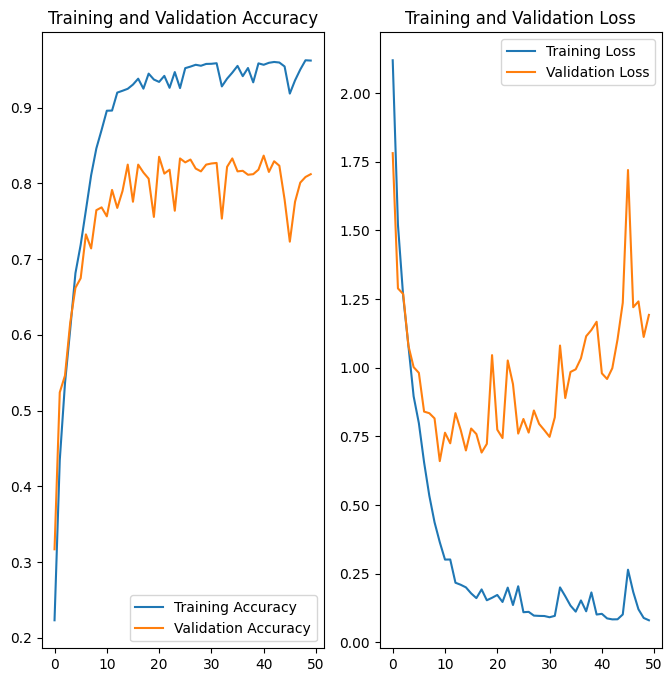

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [ ]:
We can clearly see the adding Augmentation, drop outs and decreasing the class imbalance has vastly helped in increasing the accuracy of the model and decrease overfitting.

If we see both the graphs, we see that both training and validation accuracy increases for close to 20 epochs and then the model overfits.
We can also see the same for training and validation loss.


